# Importing necessary packages

In [259]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix, roc_curve, roc_auc_score, ConfusionMatrixDisplay, RocCurveDisplay

In [125]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


## Reading the CSV FILE

In [126]:
df_dentist = pd.read_csv('Dentistry Dataset.csv')

In [127]:
df_dentist.head() # top five rows displayed

,Sl No,Sample ID,Age,Gender,inter canine distance intraoral,intercanine distance casts,right canine width intraoral,right canine width casts,left canine width intraoral,left canine width casts,right canine index intra oral,right canine index casts,left canine index intraoral,left canine index casts
0,1,NaN,24,Female,25.06,25.05,6.08,6.08,6.09,6.10,0.242,0.242,0.242,0.241
1,2,NaN,22,Female,25.78,25.79,6.13,6.13,6.33,6.33,0.237,0.237,0.247,0.247
2,3,NaN,23,Female,23.83,23.83,5.91,5.96,6.28,6.28,0.248,0.248,0.264,0.264
3,4,NaN,20,Female,26.12,26.12,6.08,6.08,6.56,6.56,0.232,0.232,0.250,0.250
4,5,NaN,20,Female,26.36,26.41,6.09,6.09,6.50,6.50,0.231,0.231,0.246,0.246


In [128]:
df_dentist.info() # Information about each features

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Sl No                            1100 non-null   int64  
 1   Sample ID                        0 non-null      float64
 2   Age                              1100 non-null   int64  
 3   Gender                           1100 non-null   object 
 4   inter canine distance intraoral  1100 non-null   float64
 5   intercanine distance casts       1100 non-null   float64
 6   right canine width intraoral     1100 non-null   float64
 7   right canine width casts         1100 non-null   float64
 8   left canine width intraoral      1100 non-null   float64
 9   left canine width casts          1100 non-null   float64
 10  right canine index intra oral    1100 non-null   float64
 11  right canine index casts         1100 non-null   float64
 12  left canine index in

In [129]:
# Checking for features which have null values
ans = [feature for feature in df_dentist.columns if df_dentist[feature].isnull().sum() > 0]
ans

['Sample ID']

In [130]:
# statistical information about each features
df_dentist.describe(include='all')

,Sl No,Sample ID,Age,Gender,inter canine distance intraoral,intercanine distance casts,right canine width intraoral,right canine width casts,left canine width intraoral,left canine width casts,right canine index intra oral,right canine index casts,left canine index intraoral,left canine index casts
count,1100.000000,0.0,1100.000000,1100,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000
unique,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,Female,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,550,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,550.500000,NaN,21.625455,NaN,25.989009,25.880082,6.563000,6.564491,6.669627,6.675018,0.253122,0.252355,0.256453,0.256361
std,317.686953,NaN,2.085892,NaN,1.315292,1.862323,0.379035,0.377553,0.375841,0.377098,0.015344,0.012892,0.012355,0.012374
min,1.000000,NaN,18.000000,NaN,23.120000,6.540000,5.460000,5.460000,5.460000,5.460000,0.223000,0.223000,0.223000,0.223000
25%,275.750000,NaN,20.000000,NaN,25.000000,24.980000,6.290000,6.300000,6.400000,6.407500,0.242000,0.242000,0.247000,0.247000
50%,550.500000,NaN,22.000000,NaN,25.900000,25.900000,6.520000,6.520000,6.660000,6.680000,0.253000,0.253000,0.255000,0.255000
75%,825.250000,NaN,23.000000,NaN,26.992500,27.000000,6.802500,6.802500,6.910000,6.920000,0.262000,0.261250,0.264250,0.264000


# 

## plotting histogram to see the skewness and distribution of each numerical features1

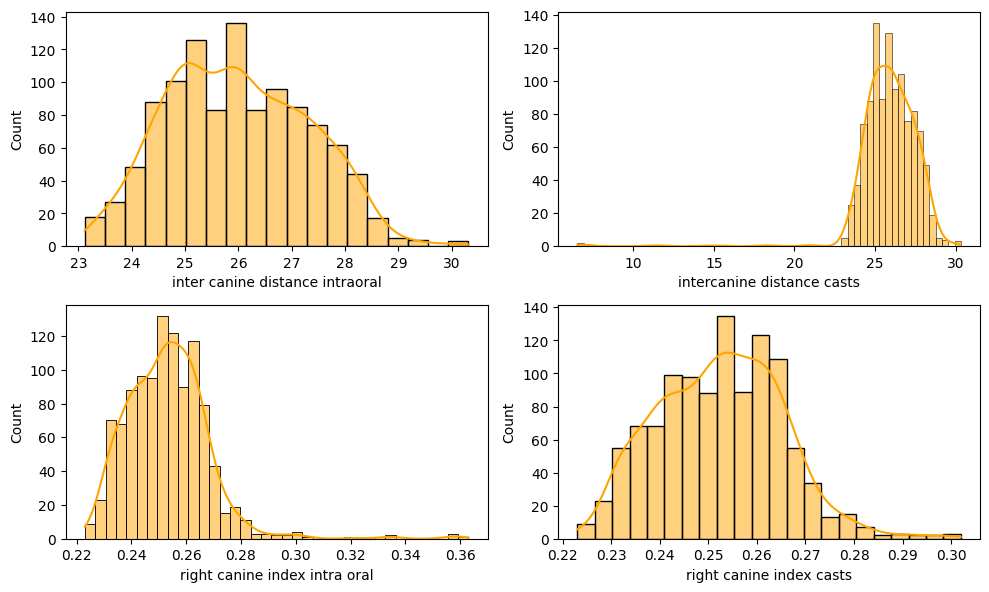

In [132]:

counter = [0,1,6,7]
graph = 1
plt.figure(figsize=(10,6))
for count, i in enumerate(df_dentist.iloc[:1,4:]):
    if count in counter:
        plt.subplot(2,2,graph)
        sns.histplot(data=df_dentist, x=i, kde= True, color= 'orange')
        graph+=1
plt.tight_layout()
plt.show()

### Some of the features in data set can be seened is skewed in nature and have a long kurtosis tail which reflects outliers.

# 

## Plotting Box plot to see for outliers in numerical features only

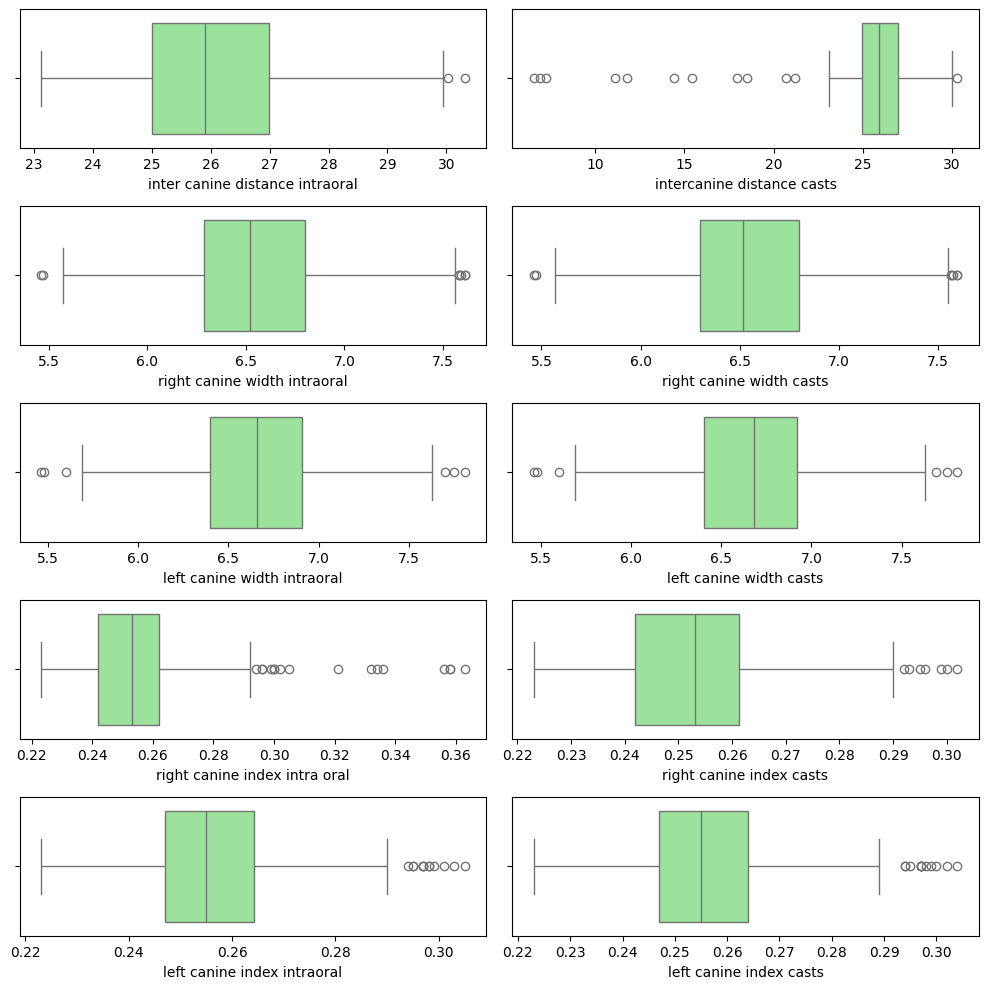

In [139]:
plt.figure(figsize=(10,10))
for count, i in enumerate(df_dentist.iloc[:1,4:]):
    plt.subplot(5,2,count+1)
    sns.boxplot(data=df_dentist, x=i, color='lightgreen')
plt.tight_layout()
plt.show()

### Clearly there are some Outliers in our features.

# 

## Treating outliers with the help of IQR

In [140]:
# finding the iqr in each features and replacing it with median value.

for count, i in enumerate(df_dentist.iloc[:1,4:]):
    q1 = df_dentist[i].quantile(.25)
    q3 = df_dentist[i].quantile(.75)
    
    iqr = q3-q1
    
    out_q1 = q1-(1.5*iqr)
    out_q3 = q3+(1.5*iqr)
    
    # replacing outliers with median 
    df_dentist[i] = np.where((df_dentist[i]<out_q1) | (df_dentist[i]>out_q3), df_dentist[i].median(), df_dentist[i])
    
    # checking for outliers if still left
    outliers = df_dentist[(df_dentist[i]<out_q1) | (df_dentist[i]>out_q3)][i].count()
    
    # printing the no. of outliers found after replacing with median.
    print(f'Total No. of Outliers in column {i} is {outliers}')

Total No. of Outliers in column inter canine distance intraoral is 0
Total No. of Outliers in column intercanine distance casts is 0
Total No. of Outliers in column right canine width intraoral is 0
Total No. of Outliers in column right canine width casts is 0
Total No. of Outliers in column left canine width intraoral is 0
Total No. of Outliers in column left canine width casts is 0
Total No. of Outliers in column right canine index intra oral is 0
Total No. of Outliers in column right canine index casts is 0
Total No. of Outliers in column left canine index intraoral is 0
Total No. of Outliers in column left canine index casts is 0


### No More outliers found after treating the outliers.

# 

## Again Ploting the histogram to check the distribution after removing outliers

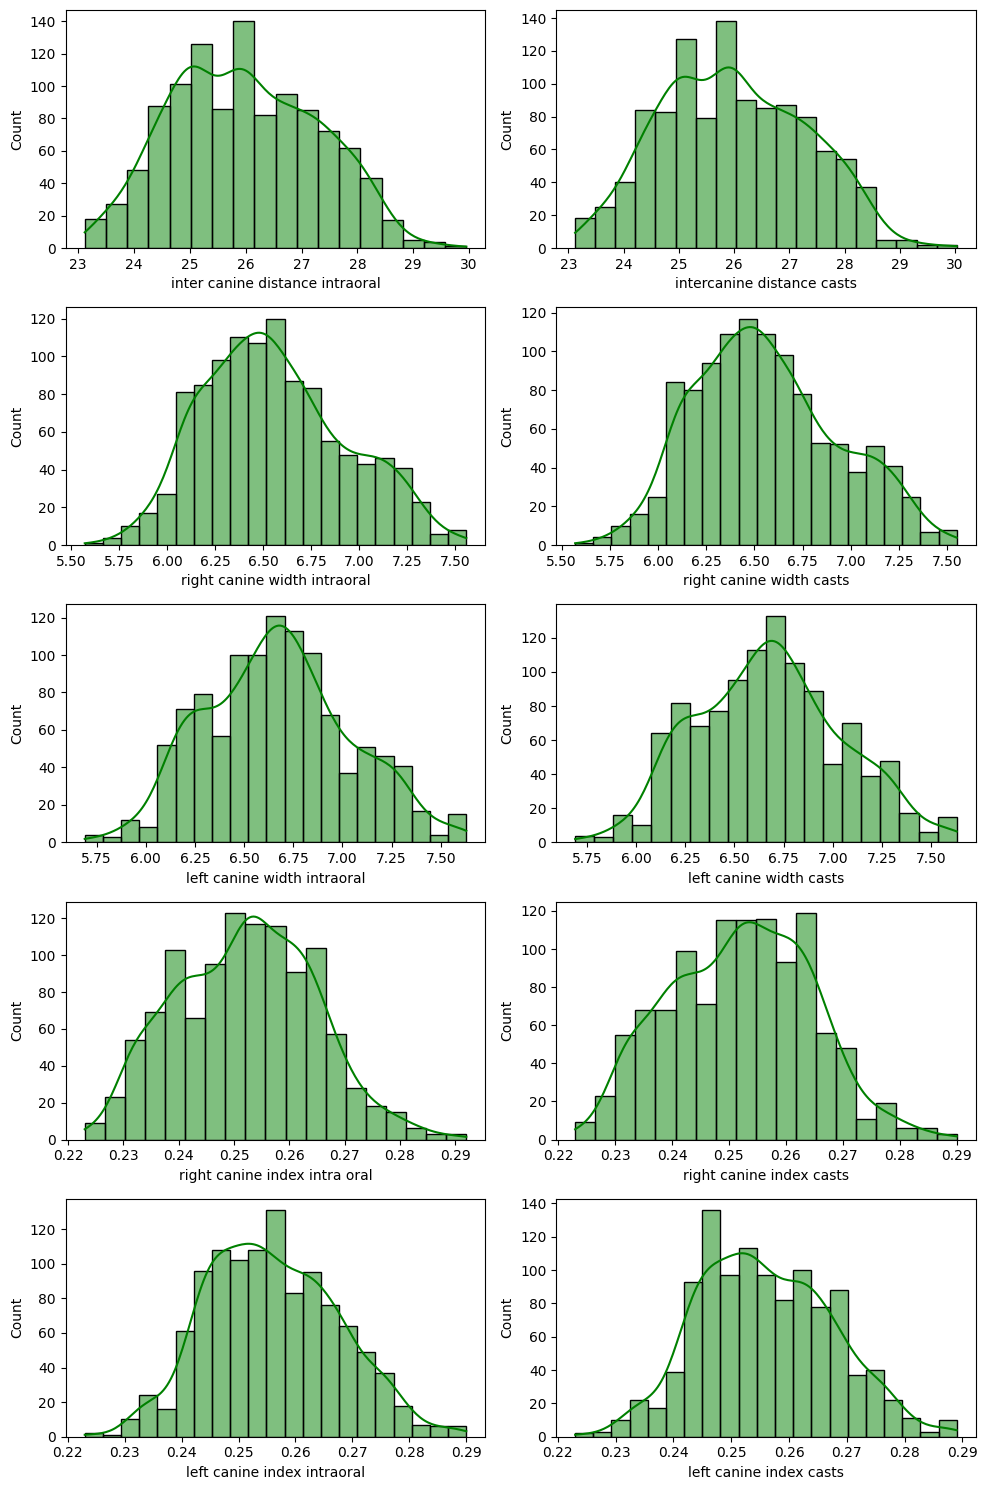

In [143]:
plt.figure(figsize=(10,15))
for count, i in enumerate(df_dentist.iloc[:1,4:]):
    plt.subplot(5,2,count+1)
    sns.histplot(data=df_dentist, x=i, kde= True, color='green')
plt.tight_layout()
plt.show()

### After removing outliers it can be observed data is now less skewed.

# 

## Cleaning the original data set and storing it in a new variable.

In [144]:
df_dentist_cleaned = df_dentist.drop(['Sl No', 'Sample ID', 'Age'], axis=1) # dropping the unnecessary features

In [145]:
# One hot encoding for categorical data

df_dentist_cleaned = pd.get_dummies(data=df_dentist_cleaned, columns=['Gender'], drop_first=True)


### Now the data is cleaned and ready for modelling

# 

## Performing EDA 

In [146]:
# FInding Correlation

corr_metrix = round(df_dentist_cleaned.corr(),2)

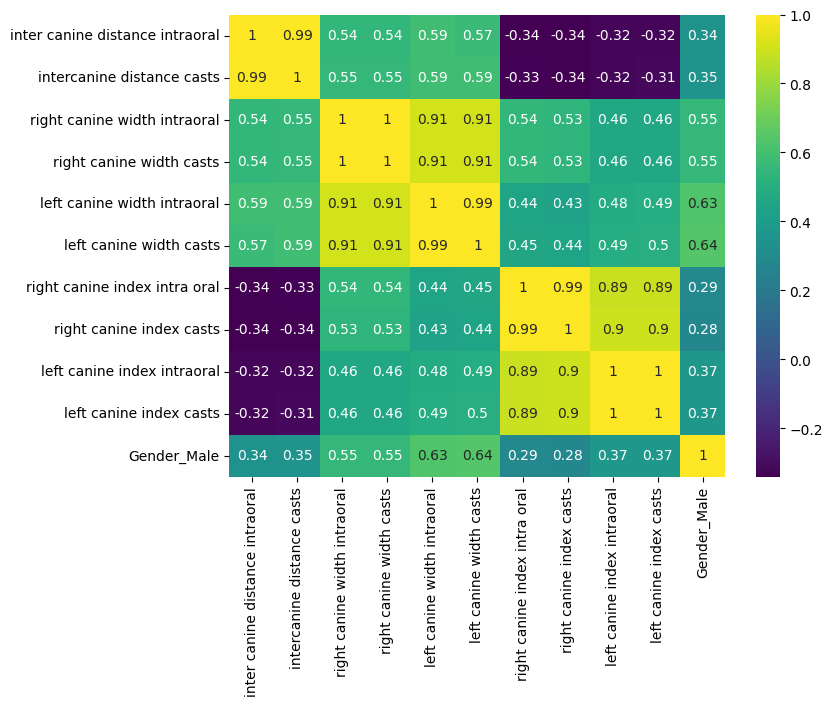

In [151]:
# Plotting the Correlation matrix 
plt.figure(figsize=(8,6))
sns.heatmap(data=corr_metrix, annot=True, cmap='viridis')
plt.show()

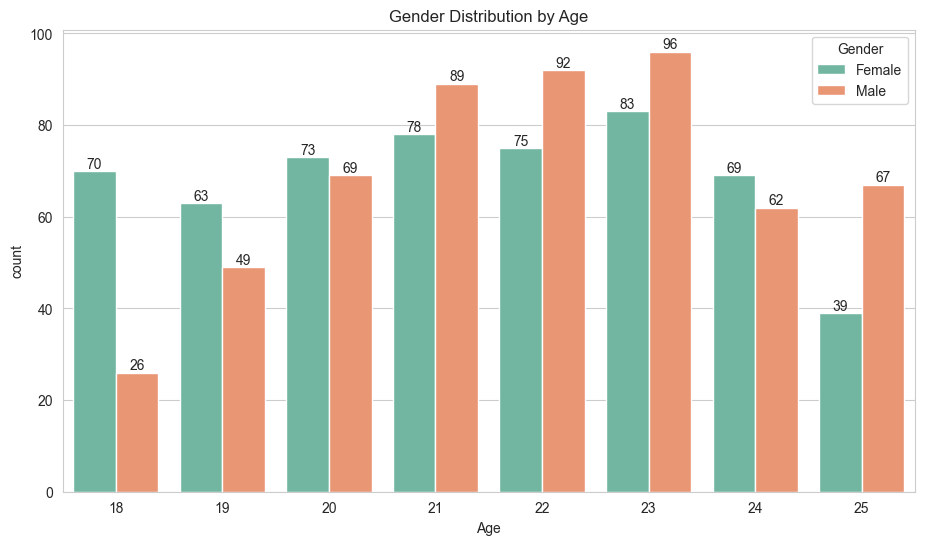

In [290]:
fig, ax = plt.subplots(figsize=(11, 6))

sns.set_style('whitegrid')
sns.countplot(data=df_dentist, x='Age', hue='Gender', palette='Set2')

for container in ax.containers:
    ax.bar_label(container)

plt.title('Gender Distribution by Age')
plt.show()

# Model Prepration

In [152]:
# Storing features in x and y variables.

x = df_dentist_cleaned.drop(['Gender_Male'], axis=1) # independent variable
y = df_dentist_cleaned[['Gender_Male']] # dependent variable

In [153]:
# Importing train test split

from sklearn.model_selection import train_test_split

In [154]:
# Splitting the data into train and test data

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [155]:
from sklearn.preprocessing import StandardScaler

# Standardising the xtrain and xtest data

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train) # Usinng fit tansform in x train
x_test = scaler.transform(x_test) # Using tranform in x test to prevent data leakage

# 

## Logistic Regression Algorithm 

In [156]:
# importing Logistic Regression

from sklearn.linear_model import LogisticRegression
LGR = LogisticRegression()

In [157]:
LGR.fit(x_train,y_train)

LogisticRegression()

In [158]:
LGR.score(x_train,y_train)

0.8068181818181818

In [159]:
LGR.score(x_test, y_test)

0.8454545454545455

In [160]:
y_pred_lgr = LGR.predict(x_test)

In [161]:
# Performance metrics
print('********Logistic Regression Scores***********')
lgr_accuracy_score = accuracy_score(y_test, y_pred_lgr)
print(f'Accuracy Score = {lgr_accuracy_score}')

lgr_recall_score = recall_score(y_test, y_pred_lgr)
print(f'Recall Score = {lgr_recall_score}')

lgr_F1_score = f1_score(y_test, y_pred_lgr)
print(f'F1 Score = {lgr_F1_score}')

lgr_Precission_score = precision_score(y_test, y_pred_lgr)
print(f'Precission Score = {lgr_Precission_score}')

********Logistic Regression Scores***********
Accuracy Score = 0.8454545454545455
Recall Score = 0.8446601941747572
F1 Score = 0.8365384615384616
Precission Score = 0.8285714285714286


# #

## Decission Tree Algorithm

In [162]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()

In [163]:
dtc.fit(x_train, y_train)

DecisionTreeClassifier()

In [164]:
dtc.score(x_train,y_train)

1.0

In [165]:
dtc.score(x_test,y_test)

0.8590909090909091

In [166]:
y_pred_dtc = dtc.predict(x_test)

In [167]:
# Performance metrics
print('********Decission Tree Scores***********')
dtc_accuracy_score = accuracy_score(y_test, y_pred_dtc)
print(f'Accuracy Score = {dtc_accuracy_score}')

dtc_recall_score = recall_score(y_test, y_pred_dtc)
print(f'Recall Score = {dtc_recall_score}')

dtc_F1_score = f1_score(y_test, y_pred_dtc)
print(f'F1 Score = {dtc_F1_score}')

dtc_Precission_score = precision_score(y_test, y_pred_dtc)
print(f'Precission Score = {dtc_Precission_score}')

********Decission Tree Scores***********
Accuracy Score = 0.8590909090909091
Recall Score = 0.8737864077669902
F1 Score = 0.8530805687203792
Precission Score = 0.8333333333333334


# 

## Random Forest

In [176]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier()

In [177]:
RFC.fit(x_train,y_train)

RandomForestClassifier()

In [178]:
RFC.score(x_train,y_train)

1.0

In [179]:
RFC.score(x_test, y_test)

0.8772727272727273

In [180]:
y_pred_rfc = RFC.predict(x_test)

In [181]:
# Performance metrics
print('********Decission Tree Scores***********')
rfc_accuracy_score = accuracy_score(y_test, y_pred_rfc)
print(f'Accuracy Score = {rfc_accuracy_score}')

rfc_recall_score = recall_score(y_test, y_pred_rfc)
print(f'Recall Score = {rfc_recall_score}')

rfc_F1_score = f1_score(y_test, y_pred_rfc)
print(f'F1 Score = {rfc_F1_score}')

rfc_Precission_score = precision_score(y_test, y_pred_rfc)
print(f'Precission Score = {rfc_Precission_score}')

********Decission Tree Scores***********
Accuracy Score = 0.8772727272727273
Recall Score = 0.9029126213592233
F1 Score = 0.8732394366197184
Precission Score = 0.8454545454545455


# 

## Gradient Boosting 

In [246]:
from sklearn.ensemble import GradientBoostingClassifier
GBC = GradientBoostingClassifier()

In [247]:
GBC.fit(x_train, y_train)

GradientBoostingClassifier()

In [248]:
GBC.score(x_train, y_train)

0.946590909090909

In [249]:
GBC.score(x_test, y_test)

0.9

In [250]:
y_pred_gbc = GBC.predict(x_test)

In [251]:
# Performance metrics
print('********Decission Tree Scores***********')
gbc_accuracy_score = accuracy_score(y_test, y_pred_gbc)
print(f'Accuracy Score = {gbc_accuracy_score}')

gbc_recall_score = recall_score(y_test, y_pred_gbc)
print(f'Recall Score = {gbc_recall_score}')

gbc_F1_score = f1_score(y_test, y_pred_gbc)
print(f'F1 Score = {gbc_F1_score}')

gbc_Precission_score = precision_score(y_test, y_pred_gbc)
print(f'Precission Score = {gbc_Precission_score}')

********Decission Tree Scores***********
Accuracy Score = 0.9
Recall Score = 0.912621359223301
F1 Score = 0.8952380952380954
Precission Score = 0.8785046728971962


# 

## xgboost

In [252]:
from xgboost import XGBClassifier
xgb = XGBClassifier()

In [253]:
xgb.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [254]:
xgb.score(x_train, y_train)


1.0

In [255]:
xgb.score(x_test, y_test)

0.8545454545454545

In [256]:
y_pred_xgb = xgb.predict(x_test)

In [257]:
accuracy_score(y_test, y_pred_xgb)

0.8545454545454545

## The Best scores we have got from our model is from the Gradient boost Algorithm so we have further plot some of the metrics to visualise our findings

## 

## Confusion Metrics - to show the true and false relations

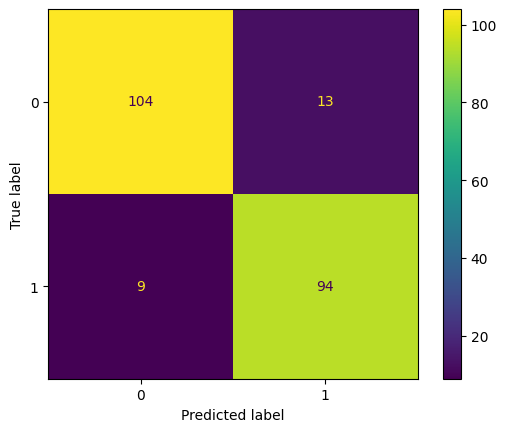

In [265]:
cm = confusion_matrix(y_test, y_pred_gbc)

cm_display = ConfusionMatrixDisplay(confusion_matrix=cm)
cm_display.plot()
plt.show()

## 

## ROC-AUC Curve from Gradient Boosting

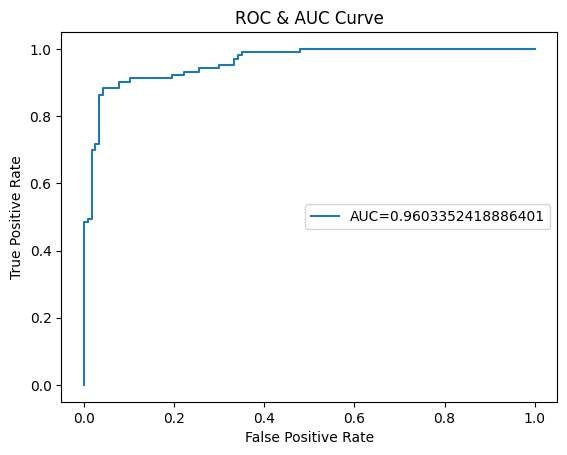

In [279]:
y_pred_prob = GBC.predict_proba(x_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_prob)
auc = roc_auc_score(y_test, y_pred_prob)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=5)
plt.title('ROC & AUC Curve')
plt.show()

## The ROC Curve is slopping towards the left upper side this states that the model is classifying the data into categories more appropriately and the AOC score of .96 also states that it is classifying the datat into categories more effectively.

## 